# Chapter 11 -- Panda Readers 

## Topics Covered

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#pd.read_csv(URL)-method">pd.read_csv(URL) method</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#SQLAlchemy-Under-the-Covers">SQL Alchemy Under the Covers</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers#read_sql_table.ipynb"> read_sql_table </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers#read_sql_query.ipynb"> read_sql_query </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#DataFrame.to_sql">DataFrame.to_sql </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#pd.read_sas">pd.read_sas() method</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#Resources">Resources</a>

In [2]:
import pyodbc
import sys
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, MetaData, Table, select
from IPython.display import Image

Return the Python and panda version being used since the database library drivers need to be properly aligned.

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.18.1


## pd.read_csv(URL) method 

This notebook contains several examples of the pd.read_csv() method.  Additional examples are used in Chapter 04--Pandas, Part 1, located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#pd.read_csv()">here</a>, and 2 additional examples in Chapter 09--Pandas Time Series and Date Handling, located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Part-1-of-.csv-File-to-Construct-the-'df_us'-DataFrame"> here</a>.


The pd.read_csv() method accepts a range of file format types.  In the example below, a URL is given as the input source.  In the SAS example that follows, the FILENAME URL access method is utilized to the same effect.

In [ ]:
fips = pd.read_csv('http://www2.census.gov/geo/docs/reference/codes/files/national_county.txt',
                              header=None,names=['state','state_fips','county_fips','county','fips_class_code'])
fips.shape

````
    /******************************************************/
    /* c11_read_csv_url_method.sas                        */
    /******************************************************/
    44       filename ctyfips url "http://www2.census.gov/geo/docs/reference/codes/files/national_c
    44     ! ounty.txt";
    45       
    46       data cnty_fips;
    47       length county_nm $ 40
    48              st_name $ 32 ;
    49       
    50          infile ctyfips dlm=',';
    51          input st_abrev $
    52                st_fips $
    53                cnty_fips $
    54                county_nm $
    55                ;
    56       
    57       st_name = fipnamel(st_fips);

````

## SQLAlchemy Under the Covers

The clever folks who brought you pandas also figured out they can avoid re-inventing so they utilize <a href="http://www.sqlalchemy.org/"> SQLAlchemy </a> as an abstraction layer to the usual databases out there.  This approach reduces the amount of database-dependent code pandas need internally.

Using SQLAlchemy you can pass SQLAlchemy Expression language constructs which are database-agnostic.  This is analogous to PROC SQL's behavior of general SQL constructs being translated to specific a database without you having to know the specific SQL dialect.

Two parts needed.  You need the SQLAlchemy package.  Im my case, it was a part of the Anaconda 4.1 distribution for Windows.  

The second is the driver library for the target database.  In my case, I am using MS SQL/Server, 2016.  The target database used below is AdventureWorksDW2012 which Microsoft provides to illustrate their Analytical Services. 

The examples are analogous to SAS' SQL pass-thru approach where PROC SQL is a wrapper to pass-thru the SQL dialect specific to the database.   

To connect to the database with SQLAlchemy, you construct a connection string to the database (uri) using the create_engine() method.  The SQLAlchemy doc for the various databases are <a href="http://docs.sqlalchemy.org/en/rel_1_1/core/connections.html"> here </a>. This only needs to be executed once for the connection shown as:

    ServerName = "homeoffice2"
    Database = "AdventureWorksDW2012?driver=SQL+Server+Native+Client+11.0"
    TableName = "DimCustomer"

    engine = create_engine('mssql+pyodbc://' + ServerName + '/' + Database, legacy_schema_aliasing=False)
    
The string:
 
  ?driver=SQL+Server+Native+Client+11.0
  
was needed to inform SQLAlchemy the name of the specific database client library.  This is found on the Driver's tab of the ODBC Data Source Adminstrator.

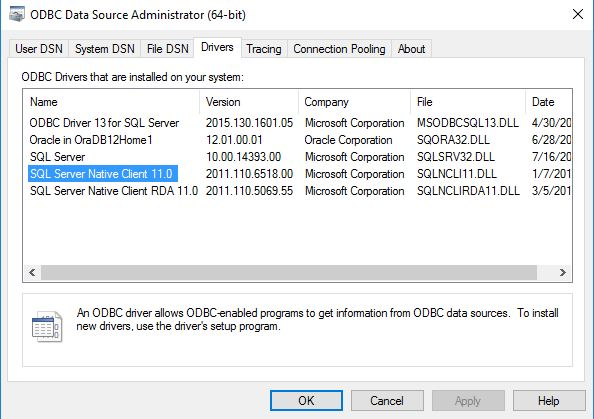

In [4]:
Image(filename='Anaconda3\\output\\odbc.JPG')

Next, create a tuple of parameter values to pass to the create_engine= assignment to identify the Python package used on the client-side as well as the database server name, target database, and target table. 

In [3]:
ServerName = "homeoffice2"
Database = "AdventureWorksDW2012?driver=SQL+Server+Native+Client+11.0"
TableName = "DimCustomer"

engine = create_engine('mssql+pyodbc://' + ServerName + '/' + Database, legacy_schema_aliasing=False)
conn = engine.connect()

metadata = MetaData(conn)

## read_sql_table()

The read_sql_table() method reads a database table and optionally a subset of columns.  The syntax is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html#pandas.read_sql_table"> here </a>.

For clarity, we build a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#list">list</a> of columns we want to have returned along with a table name that are used as arguments in the next set of examples.

In [5]:
col_names = ['FirstName', 'LastName', 'BirthDate', 'Gender', 'YearlyIncome', 'CustomerKey']
tbl = 'DimCustomer'

In [6]:
t0 = pd.read_sql_table(tbl, engine, columns=col_names)
t0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 6 columns):
FirstName       18484 non-null object
LastName        18484 non-null object
BirthDate       18484 non-null datetime64[ns]
Gender          18484 non-null object
YearlyIncome    18484 non-null float64
CustomerKey     18484 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 866.5+ KB


Designate an incoming column to be used as the DataFrame index with the index_col= argument.

In [7]:
t1 = pd.read_sql_table(tbl, engine, columns=col_names, index_col='CustomerKey')
t1.index

Int64Index([11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008,
            11009,
            ...
            29474, 29475, 29476, 29477, 29478, 29479, 29480, 29481, 29482,
            29483],
           dtype='int64', name='CustomerKey', length=18484)

Coerce date strings into date objects.  The example below is redundant since the query engine was smart enough to determine t0['BirthDate'] is a date column.  This is shown by examining output from t0.info() call showing the column as type datetime64.

In [8]:
t2 = pd.read_sql_table(tbl, engine, columns=col_names, index_col='CustomerKey', \
                       parse_dates={'BirthDate': {'format': '%Y-%m-%d'}})


Review the incoming columns and their attributes.

In [9]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 11000 to 29483
Data columns (total 5 columns):
FirstName       18484 non-null object
LastName        18484 non-null object
BirthDate       18484 non-null datetime64[ns]
Gender          18484 non-null object
YearlyIncome    18484 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 866.4+ KB


Review the customer index key values.

In [10]:
t2.index

Int64Index([11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008,
            11009,
            ...
            29474, 29475, 29476, 29477, 29478, 29479, 29480, 29481, 29482,
            29483],
           dtype='int64', name='CustomerKey', length=18484)

Display the first 5 rows for the the 'BirthDate' column.  Also notice above, from the .info() method how the t2['BirthDate'] column was read as datetime timestamps.

In [51]:
t2["BirthDate"].head(5)

CustomerKey
11000   1966-04-08
11001   1965-05-14
11002   1965-08-12
11003   1968-02-15
11004   1968-08-08
Name: BirthDate, dtype: datetime64[ns]

The SAS program below reads the same input table from SQL/Server called DimCustomer.  Under the covers, SAS constructs the appropriate TSQL statements to retrieve rows and columns forming the SAS data set WORK.CUSTOMERS.

In this case, SAS reads the 'BirthDate' variable as a string.  The SAS/Access product line provide an array of SAS Data Set options to map data types between SAS and SQL/Server described<a href="https://support.sas.com/documentation/cdl/en/acreldb/63647/HTML/default/viewer.htm#a001405621.htm"> here</a>.  SAS/Access products are outside the scope of these examples.  

````
    /******************************************************/
    /* c11_pd.read_sql_table.sas                          */
    /******************************************************/
    4         proc pwencode in=XXXXXXXXX;
    {sas001}UG9yc2hjZSMx
    5         
    6         libname sqlsrvr odbc
    7                  uid=randy
    8                  pwd=XXXXXXXXXXXXXXXXXXXX
    9                  datasrc=mssql
    10                 bulkload=yes;
    11        
    12        proc sql;
    13           create table customers as
    14           select FirstName,
    15                  LastName,
    16                  BirthDate,
    17                  Gender,
    18                  YearlyIncome,
    19                  CustomerKey
    20           from sqlsrvr.DimCustomer;
    NOTE: Data set "WORK.customers" has 18484 observation(s) and 6 variable(s)
    21        quit;
    22        
    23        data _null_;
    24           set customers(obs=5);
    25        
    26        bdate = input(birthdate, yymmdd10.);
    27        bd_f = put(bdate, yydddd10.);
    28        
    29        put bd_f;

    1966-04-08
    1965-05-14
    1965-08-12
    1968-02-15
    1968-08-08
````

## read_sql_query() method

The read_sql_query() method returns a DataFrame based on the evaluation of a query string. It is similiar to the read_sql_table() method described above.  

You must use the appropriate SQL dialect for the target database.  This is analogous to SAS' SQL pass-thru.

In [11]:
q1 = pd.read_sql_query('SELECT FirstName, LastName, Gender, BirthDate, YearlyIncome '
                 'FROM dbo.DimCustomer '
                 'WHERE YearlyIncome > 50000;'
                        , engine)

In [12]:

q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 5 columns):
FirstName       9858 non-null object
LastName        9858 non-null object
Gender          9858 non-null object
BirthDate       9858 non-null object
YearlyIncome    9858 non-null float64
dtypes: float64(1), object(4)
memory usage: 385.2+ KB


The SAS analog example for pd.read_sql_query in cell #12 above is shown below.  Similiar to the create_engine() method, the connect to ODBC statement uses a series of arguments to used to make authenicated calls into the database.  All of the SQL statements inside the parethensized expression is not scanned by the SAS tokenizer/parser and is passed to the database for execution.  Returning rows and columns are returned by the ODBC api.

````
    15       LIBNAME in_sql ODBC DSN="mssql";
    16       
    17       proc sql;
    18       connect to odbc(datasrc=mssql uid=randy password=XXXXXXXX);
    NOTE: Successfully connected to database ODBC as alias ODBC.
    19           create table q1 as
    20          select * from connection to odbc
    21          (select FirstName,
    22                  LastName,
    23                  Gender,
    24                  BirthDate,
    25                  YearlyIncome
    26           from dbo.DimCustomer
    27           where YearlyIncome > 50000);
    NOTE: Data set "WORK.q1" has 9858 observation(s) and 5 variable(s)
````

...or pass a DocStrings to the pd.read_sql_query() method.

In [13]:
sql_str = '''SELECT
                    FirstName,
                    LastName,
                    Gender,
                    CustomerKey,
                    BirthDate
             FROM DimCustomer  
             WHERE YearlyIncome > 120000''' 

q2 = pd.read_sql_query(sql_str, engine, index_col='CustomerKey')

In [15]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 11079 to 29261
Data columns (total 4 columns):
FirstName    821 non-null object
LastName     821 non-null object
Gender       821 non-null object
BirthDate    821 non-null object
dtypes: object(4)
memory usage: 32.1+ KB


You can execute a query without returning a dataframe with execute(). This is useful for queries that don’t return values, such as a DROP TABLE statement.  You must use the SQL dialect appropriate for the target database.

In [21]:
from pandas.io import sql
sql.execute('DROP TABLE dbo.df2', engine)

## DataFrame.to_sql

Construct the DataFrame to load into SQL/Server.

In [23]:
df = pd.DataFrame([['cold','slow', np.nan, 2., 6., 3.], 
                   ['warm', 'medium', 4, 5, 7, 9],
                   ['hot', 'fast', 9, 4, np.nan, 6],
                   ['cool', None, np.nan, np.nan, 17, 89],
                   ['cool', 'medium', 16, 44, 21, 13],
                   ['cold', 'slow', np.nan, 29, 33, 17]],
                   columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'],
                   index=(list('abcdef')))

The .DataFrame.to_sql method loads a target DBMS table with the rows and columns from a DataFrame.  The syntax is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html"> here </a>.  The method has the chunksize= parameter where the default None writes all rows at once.  The doc does not specify how the writes take place, either through SQL INSERT statements or uses a bulk copy interface.

In [29]:
df.to_sql('dbo.DF2', engine, if_exists='replace',index=False)

The analog SAS program to copy a SAS data set to the target DBMS is below.  Note the PROC PWENCODE used to encode strings to prevent passwords from being stored in clear text.  Also notice the LIBNAME option bulkload=yes.  This causes the load operation to go through the RDBMS' bulk load interface.

````
    /******************************************************/
    /* c11_DataFrame.to_sql.sas                           */
    /******************************************************/

    56       proc pwencode in=XXXXXXXXX;
    {sas001}UG9yc2hjZSMx
    57       
    58       libname sqlsrvr odbc
    59                uid=randy
    60                pwd=XXXXXXXXXXXXXXXXXXXX
    61                datasrc=mssql
    62                bulkload=yes;

    63       
    64       data sqlsrvr.tickets;
    65          set tickets;

   NOTE: 72 observations were read from "WORK.tickets"
   NOTE: Data set "SQLSRVR.tickets" has an unknown number of observation(s) and 5 variable(s)
   
````

## pd.read_sas

The pd.read_sas() method maps either a SAS data set (.sas7bdat file) or a SAS transport data set (.xpt file) directly into a DataFrame.  The syntax details are located <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sas.html">here</a>.  This is a SAS data set created by Base SAS software and not WPS.

In [3]:
df4 = pd.read_sas("c:\\Data\\accident.sas7bdat", format='SAS7BDAT')

In [5]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 52 columns):
STATE         32166 non-null float64
ST_CASE       32166 non-null float64
VE_TOTAL      32166 non-null float64
VE_FORMS      32166 non-null float64
PVH_INVL      32166 non-null float64
PEDS          32166 non-null float64
PERNOTMVIT    32166 non-null float64
PERMVIT       32166 non-null float64
PERSONS       32166 non-null float64
COUNTY        32166 non-null float64
CITY          32166 non-null float64
DAY           32166 non-null float64
MONTH         32166 non-null float64
YEAR          32166 non-null float64
DAY_WEEK      32166 non-null float64
HOUR          32166 non-null float64
MINUTE        32166 non-null float64
NHS           32166 non-null float64
RUR_URB       32166 non-null float64
FUNC_SYS      32166 non-null float64
RD_OWNER      32166 non-null float64
ROUTE         32166 non-null float64
TWAY_ID       32166 non-null object
TWAY_ID2      8400 non-null object
MILEPT

The following SAS program was used to create both a SAS data and a SAS transport SAS data set.  Both were created with Version: 3.2.2 of the WPS Workbench for Windows.  The SAS data DATA.COMPANY failed to be read with the pd.read_sas() method.  The SAS transport file was read correctly below.

````
    /******************************************************/
    /* c11_write_export_file.sas                          */
    /******************************************************/
     93       libname data 'c:\data';
     94       libname xptout xport "c:\data\company.xpt";
     95       
     96              data data.company;
     97                 input Name $ 1-25 Age 27-28 Gender $ 30;
     98                 datalines;
     99       
    100       Vincent, Martina          34 F
    101       Phillipon, Marie-Odile    28 F
    102       Gunter, Thomas            27 M
    103       Harbinger, Nicholas       36 M
    104       Benito, Gisela            32 F
    105       Rudelich, Herbert         39 M
    106       Sirignano, Emily          12 F
    107       Morrison, Michael         32 M
    108       ;;;;
    109       
    110       proc copy in = data
    111                 out = xptout;
    112       select company;

    NOTE: Member "DATA.COMPANY.DATA" (memtype=DATA) copied
    NOTE: 1 member copied
````

Using Version: 3.2.2 of the WPS Workbench for Windows to create its .wpd format as input to the pd.read_sas() method fails.  That is because the binary file format chosen by WPS does not match those from SAS.  

In [7]:
df5 = pd.read_sas("c:\\Data\\company.wpd", format='SAS7BDAT')

ValueError: magic number mismatch (not a SAS file?)

Using Version: 3.2.2 of the WPS Workbench for Windows to create a SAS transport file (.xpt) as input to the pd.read_sas() method works.

In [9]:
df6 = pd.read_sas("c:\\Data\\company.xpt", format='xport')

In [10]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
NAME      9 non-null object
AGE       8 non-null float64
GENDER    9 non-null object
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


## Resources

<a href="http://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries"> SQL Queries </a>, from the pandas.org doc.

<a href="http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/08%20-%20Lesson.ipynb"> How to pull data from a microsoft sql database </a>

<a href="http://docs.sqlalchemy.org/en/rel_1_1/core/connections.html"> defining the create_engine() method </a> from the SQLAlchemy doc.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>